In [70]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [12]:
 dataset_dir="C:\\Users\\athar\\Downloads\\obj\\caltech-101"
dataset_datagen=ImageDataGenerator(
    rescale= 1.0/255
)

batch_size=2000

dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=batch_size,
    class_mode='categorical'
    
)

Found 9144 images belonging to 102 classes.


In [15]:
x_train, y_train= dataset_generator[0]
x_test, y_test= dataset_generator[1]
print(len(x_train))
print(len(x_test))

2000
2000


In [46]:
weights_path="C:\\Users\\athar\\Downloads\\kera\\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model= VGG16(weights=weights_path,include_top=False,input_shape=(64,64,3))

In [47]:
for layer in base_model.layers:
    layer.trainable=False

In [48]:
x = Flatten()(base_model.output)
x = Dense(64,activation='relu')(x)
predictions = Dense(102,activation='softmax')(x)

model = Model(inputs = base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,852,454 (56.66 MB)

 Trainable params: 137,766 (538.15 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [49]:
model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 856ms/step - accuracy: 0.1549 - loss: 4.2662 - val_accuracy: 0.3020 - val_loss: 3.3868
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 884ms/step - accuracy: 0.3333 - loss: 3.0763 - val_accuracy: 0.3650 - val_loss: 2.9396
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 931ms/step - accuracy: 0.4449 - loss: 2.5301 - val_accuracy: 0.4460 - val_loss: 2.6455
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5589 - loss: 2.0768 - val_accuracy: 0.4945 - val_loss: 2.3951
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6269 - loss: 1.7550 - val_accuracy: 0.5145 - val_loss: 2.2477
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6794 - loss: 1.4941 - val_accuracy: 0.5350 - val_loss: 2.1147
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.7147 - loss: 1.3258 - val_accuracy: 0.5465 - val_loss: 2.0384
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7519 - loss: 1.1261 - val_accuracy: 0.5535 - 

In [56]:
for layer in base_model.layers [len(base_model.layers)-2:]:
    layer.trainable = True
    
x= Flatten()(base_model.output)
x= Dense(512, activation='relu')(x)
x= Dropout(0.2)(x)

predictions= Dense(102,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=predictions)
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2065 - loss: 3.7832 - val_accuracy: 0.4895 - val_loss: 2.4499
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.5713 - loss: 1.8678 - val_accuracy: 0.5605 - val_loss: 1.9564
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.7209 - loss: 1.0929 - val_accuracy: 0.5850 - val_loss: 1.7754
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8549 - loss: 0.5847 - val_accuracy: 0.6160 - val_loss: 1.7001
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9210 - loss: 0.3288 - val_accuracy: 0.6145 - val_loss: 1.7727
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9543 - loss: 0.1895 - val_accuracy: 0.6235 - val_loss: 1.7184
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9788 - loss: 0.1022 - val_accuracy: 0.6325 - val_loss: 1.7451
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9942 - loss: 0.0550 - val_accuracy: 0.6295 - val_loss:

In [57]:
predicted_value=model.predict(x_test)
labels=list(dataset_generator.class_indices.keys())

63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 325ms/step


Predicted :  ibis
Actual :  flamingo


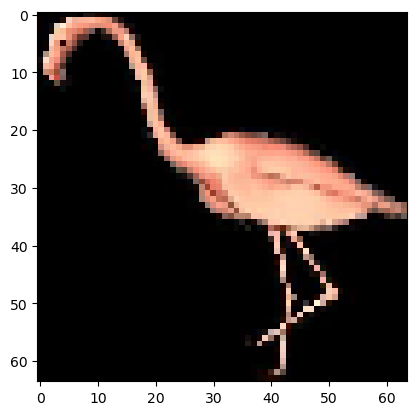

In [62]:
n=991 
plt.imshow(x_test[n])
print("Predicted : ",labels[np.argmax(predicted_value[n])])
print("Actual : ",labels[np.argmax(y_test[n])])